# 3차원 시각화

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
from scipy.stats import multivariate_normal

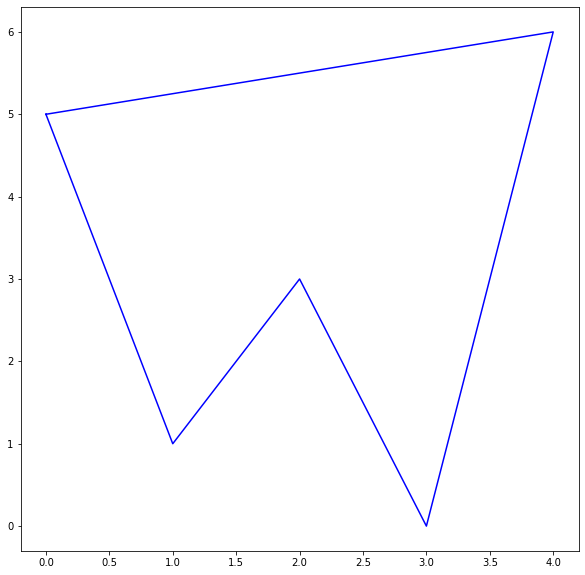

In [2]:
# 5-3
# 예제1 polygon 그리기 연습
polygon1 = Polygon([(0, 5),
   (1, 1),
   (2, 3),
   (3, 0),
   (4, 6),
])
x, y = polygon1.exterior.xy
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(x, y, c="b")
plt.show()

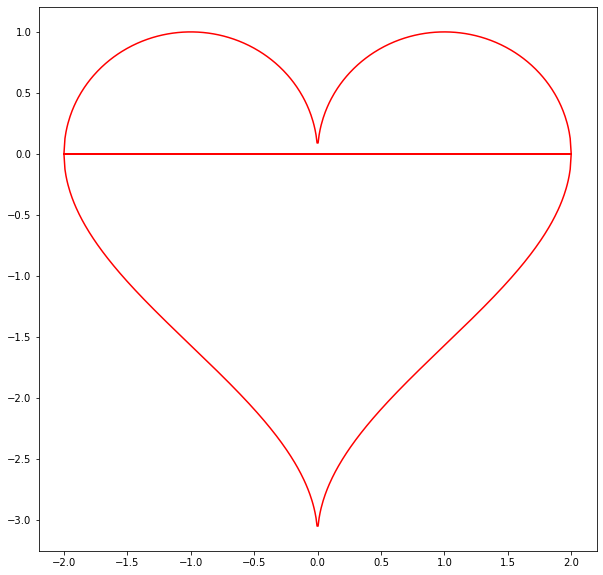

In [3]:
# 예제2 하트 모양 polygon 그리기
x = np.linspace(-2, 2, 500)
y_up = np.sqrt(1-(abs(x)-1)**2)
y_dw = np.arccos(1-abs(x)) - np.pi

polygon2 = Polygon(np.concatenate([np.stack([x, y_up], -1), np.stack([x, y_dw], -1)], 0))
x, y = polygon2.exterior.xy

fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(x, y, c="red")
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_31248\1803363362.py:16: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


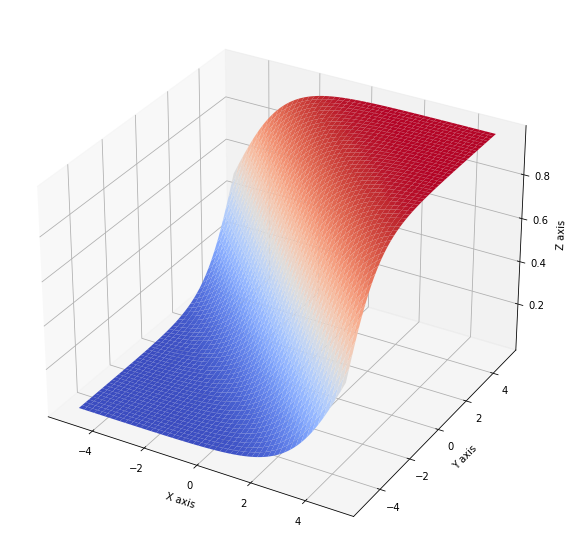

In [4]:
'''5-3-2 surface plots'''
# 예제1 sigmoid 3D plot
def sigmoid(x):
   return 1 / (1 + np.exp(-x))

x = np.linspace(-5,5,500)
y = np.linspace(-5,5,500)
X, Y = np.meshgrid(x,y)

pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y
z = sigmoid(np.sum(pos, axis=-1))

fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, z, linewidth=0, cmap="coolwarm", alpha=1.0)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_31248\934083486.py:21: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


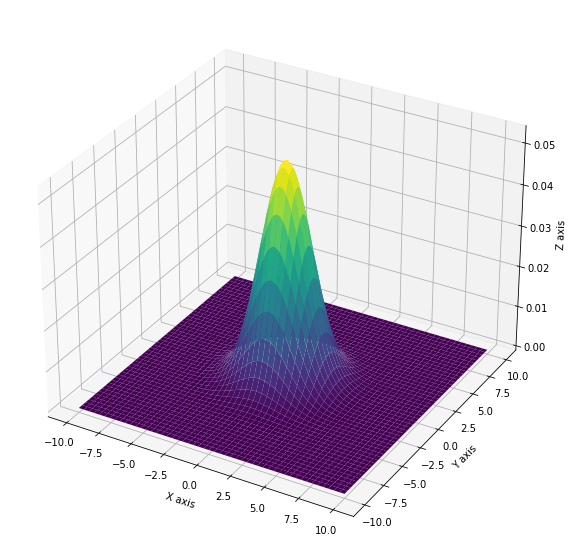

In [6]:

#%%
# 예제2 이변량 정규분포 3D plot
# 분포의 모수 지정
mu_x = 0
mu_y = 0
variance_x = 3
variance_y = 3
rv = multivariate_normal([mu_x, mu_y], [[variance_x, 0], [0, variance_y]])

# 그리드 생성
x = np.linspace(-10,10,500)
y = np.linspace(-10,10,500)
X, Y = np.meshgrid(x,y)

pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

# 이변량 정규분포 시각화
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, rv.pdf(pos), cmap='viridis',linewidth=0)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_31248\2661095834.py:9: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


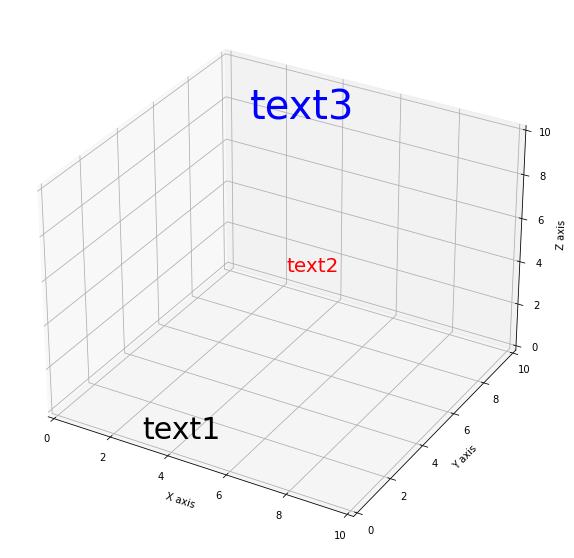

In [7]:
#%%
'''5-3-3 text in 3D plot'''
# 예제1 text3D 연습
x1 = 3.; y1 = 0.; z1 = 0.
x2 = 5.; y2 = 5.; z2 = 5.
x3 = 2.; y3 = 8.; z3 = 9.

fig = plt.figure(figsize=(10, 10), facecolor="white")
ax = fig.gca(projection='3d')

ax.text3D(x1, y1, z1, "text1", fontsize=30)
ax.text3D(x2, y2, z2, "text2", fontsize=20, color="red")
ax.text3D(x3, y3, z3, "text3", fontsize=40, color="blue")

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_zlim(0, 10)

plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_31248\3566482302.py:12: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


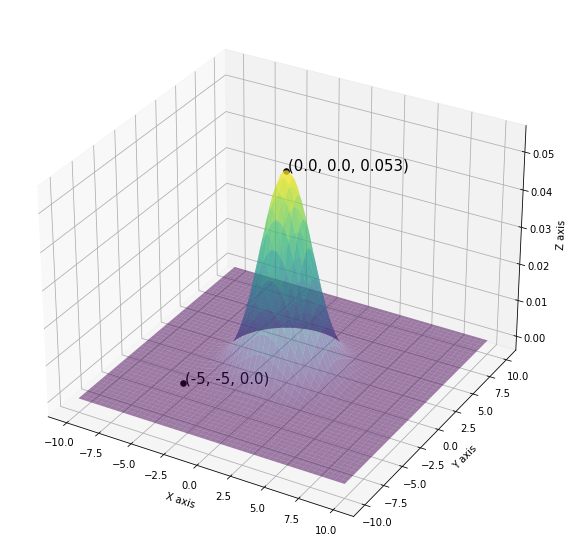

In [8]:
#%%
# 예제2 이변량 정규분포 위에 text 입력
x = np.linspace(-10,10,500)
y = np.linspace(-10,10,500)
X, Y = np.meshgrid(x,y)

pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, rv.pdf(pos), cmap='viridis',linewidth=0, alpha=0.5)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

x1 = -5; y1 = -5
ax.scatter(x1, y1, rv.pdf([x1, y1]), s=30, color="black", alpha=1.0)
ax.text3D(x1+.1, y1+.1, rv.pdf([x1, y1]), f"({x1}, {y1}, {round(rv.pdf([x1, y1]),3)})", fontsize=15)

x2 = 0.; y2 = 0.
ax.scatter(x2, y2, rv.pdf([x2, y2]), s=30, color="black", alpha=1.0)
ax.text3D(x2+.1, y2+.1, rv.pdf([x2, y2]), f"({x2}, {y2}, {round(rv.pdf([x2, y2]),3)})", fontsize=15)

plt.show()